# Building Trees using scikit-learn - Lab

## Introduction

Following the simple example you saw in the previous lesson, you'll now build a decision tree for a more complex dataset. This lab covers all major areas of standard machine learning practice, from data acquisition to evaluation of results. We'll continue to use the Scikit-learn and Pandas libraries to conduct this analysis, following the same structure we saw in the previous lesson.

## Objectives

In this lab you will:

- Use scikit-learn to fit a decision tree classification model 
- Use entropy and information gain to identify the best attribute to split on at each node 
- Plot a decision tree using Python 

## UCI Banknote authentication dataset

In this lab, you'll work with a popular dataset for classification called the "UCI Bank note authentication dataset". This data was extracted from images that were taken from genuine and forged banknotes! The notes were first digitized, followed by a numerical transformation using DSP techniques. The final set of engineered features are all continuous in nature, meaning that our dataset consists entirely of floats, with no strings to worry about. If you're curious about how the dataset was created, you can visit the UCI link [here](https://archive.ics.uci.edu/ml/datasets/banknote+authentication)!

We have the following attributes in the dataset:  

1. __Variance__ of wavelet transformed image (continuous) 
2. __Skewness__ of wavelet transformed image (continuous) 
3. __Curtosis__ of wavelet transformed image (continuous) 
4. __Entropy__ of image (continuous) 
5. __Class__ (integer) - Target/Label 

## Step 1: Import the necessary libraries 

We've imported all the necessary modules you will require for this lab, go ahead and run the following cell: 

In [1]:
# Import necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

## Step 2: Import data

Now, you'll load our dataset in a DataFrame, perform some basic EDA, and get a general feel for the data you'll be working with.

- Import the file `'data_banknote_authentication.csv'` as a pandas DataFrame. Note that there is no header information in this dataset 
- Assign column names `'Variance'`, `'Skewness'`, `'Kurtosis'`, `'Entropy'`, and `'Class'` to the dataset in the given order 
- View the basic statistics and shape of the dataset 
- Check for the frequency of positive and negative examples in the target variable

In [2]:
# Create DataFrame
df = pd.read_csv('data_banknote_authentication.csv',header=None)
df.columns = ['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Class']

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Kurtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None


In [3]:
# Describe the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
Skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
Kurtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
Entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
Class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


In [4]:
# Shape of dataset
df.shape

(1372, 5)

In [5]:
# Class frequency of target variable 
df['Class'].value_counts(normalize=True)

0    0.555394
1    0.444606
Name: Class, dtype: float64

## Step 3: Create features, labels, training, and test data

Now we need to create our feature set `X` and labels `y`:  
- Create `X` and `y` by selecting the appropriate columns from the dataset
- Create a 80/20 split on the dataset for training/test. Use `random_state=10` for reproducibility

In [6]:
# Create features and labels
X = df.drop('Class', axis=1)
y = df['Class']

In [7]:
# Perform an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 4: Train the classifier and make predictions
- Create an instance of a decision tree classifier with `random_state=10` for reproducibility
- Fit the training data to the model 
- Use the trained model to make predictions with test data

In [8]:
# Train a DT classifier
clf = DecisionTreeClassifier(random_state=10, criterion='gini')
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [9]:
# Make predictions for test data
y_preds = clf.predict(X_test)

## Step 5: Check predictive performance

Use different evaluation measures to check the predictive performance of the classifier: 
- Check the accuracy, AUC, and create a confusion matrix 
- Interpret the results 

Accuracy is :0.9781818181818182

AUC is :0.98


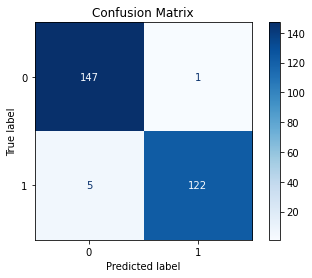


Confusion Matrix
----------------


In [10]:
# Calculate accuracy 
acc = accuracy_score(y_test, y_preds)
print('Accuracy is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_preds)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
print('\nConfusion Matrix')
print('----------------')

## Level up (Optional)


### Re-grow the tree using entropy 

The default impurity criterion in scikit-learn is the Gini impurity. We can change it to entropy by passing in the argument `criterion='entropy'` to the classifier in the training phase.  

- Create an instance of a decision tree classifier with `random_state=10` for reproducibility. Make sure you use entropy to calculate impurity 
- Fit this classifier to the training data 
- Run the given code to plot the decision tree

Accuracy is :0.9818181818181818

AUC is :0.98


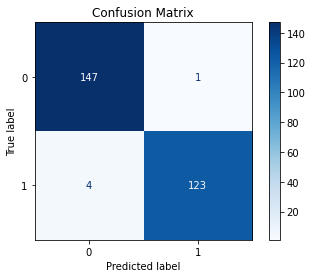

In [11]:
# Instantiate and fit a DecisionTreeClassifier
classifier_2 = DecisionTreeClassifier(random_state=10, criterion='entropy')
classifier_2.fit(X_train, y_train)

# Make predictions for test data
y_preds_2 = classifier_2.predict(X_test)

# Calculate accuracy
acc_2 = accuracy_score(y_test, y_preds_2)
print('Accuracy is :{0}'.format(acc_2))

# Check the AUC for predictions
false_positive_rate_2, true_positive_rate_2, thresholds_2 = roc_curve(y_test, y_preds_2)
roc_auc_2 = auc(false_positive_rate_2, true_positive_rate_2)
print('\nAUC is :{0}'.format(round(roc_auc_2, 2)))

# Create and print a confusion matrix
cm_2 = confusion_matrix(y_test, y_preds_2)
disp_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=classifier_2.classes_)
disp_2.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

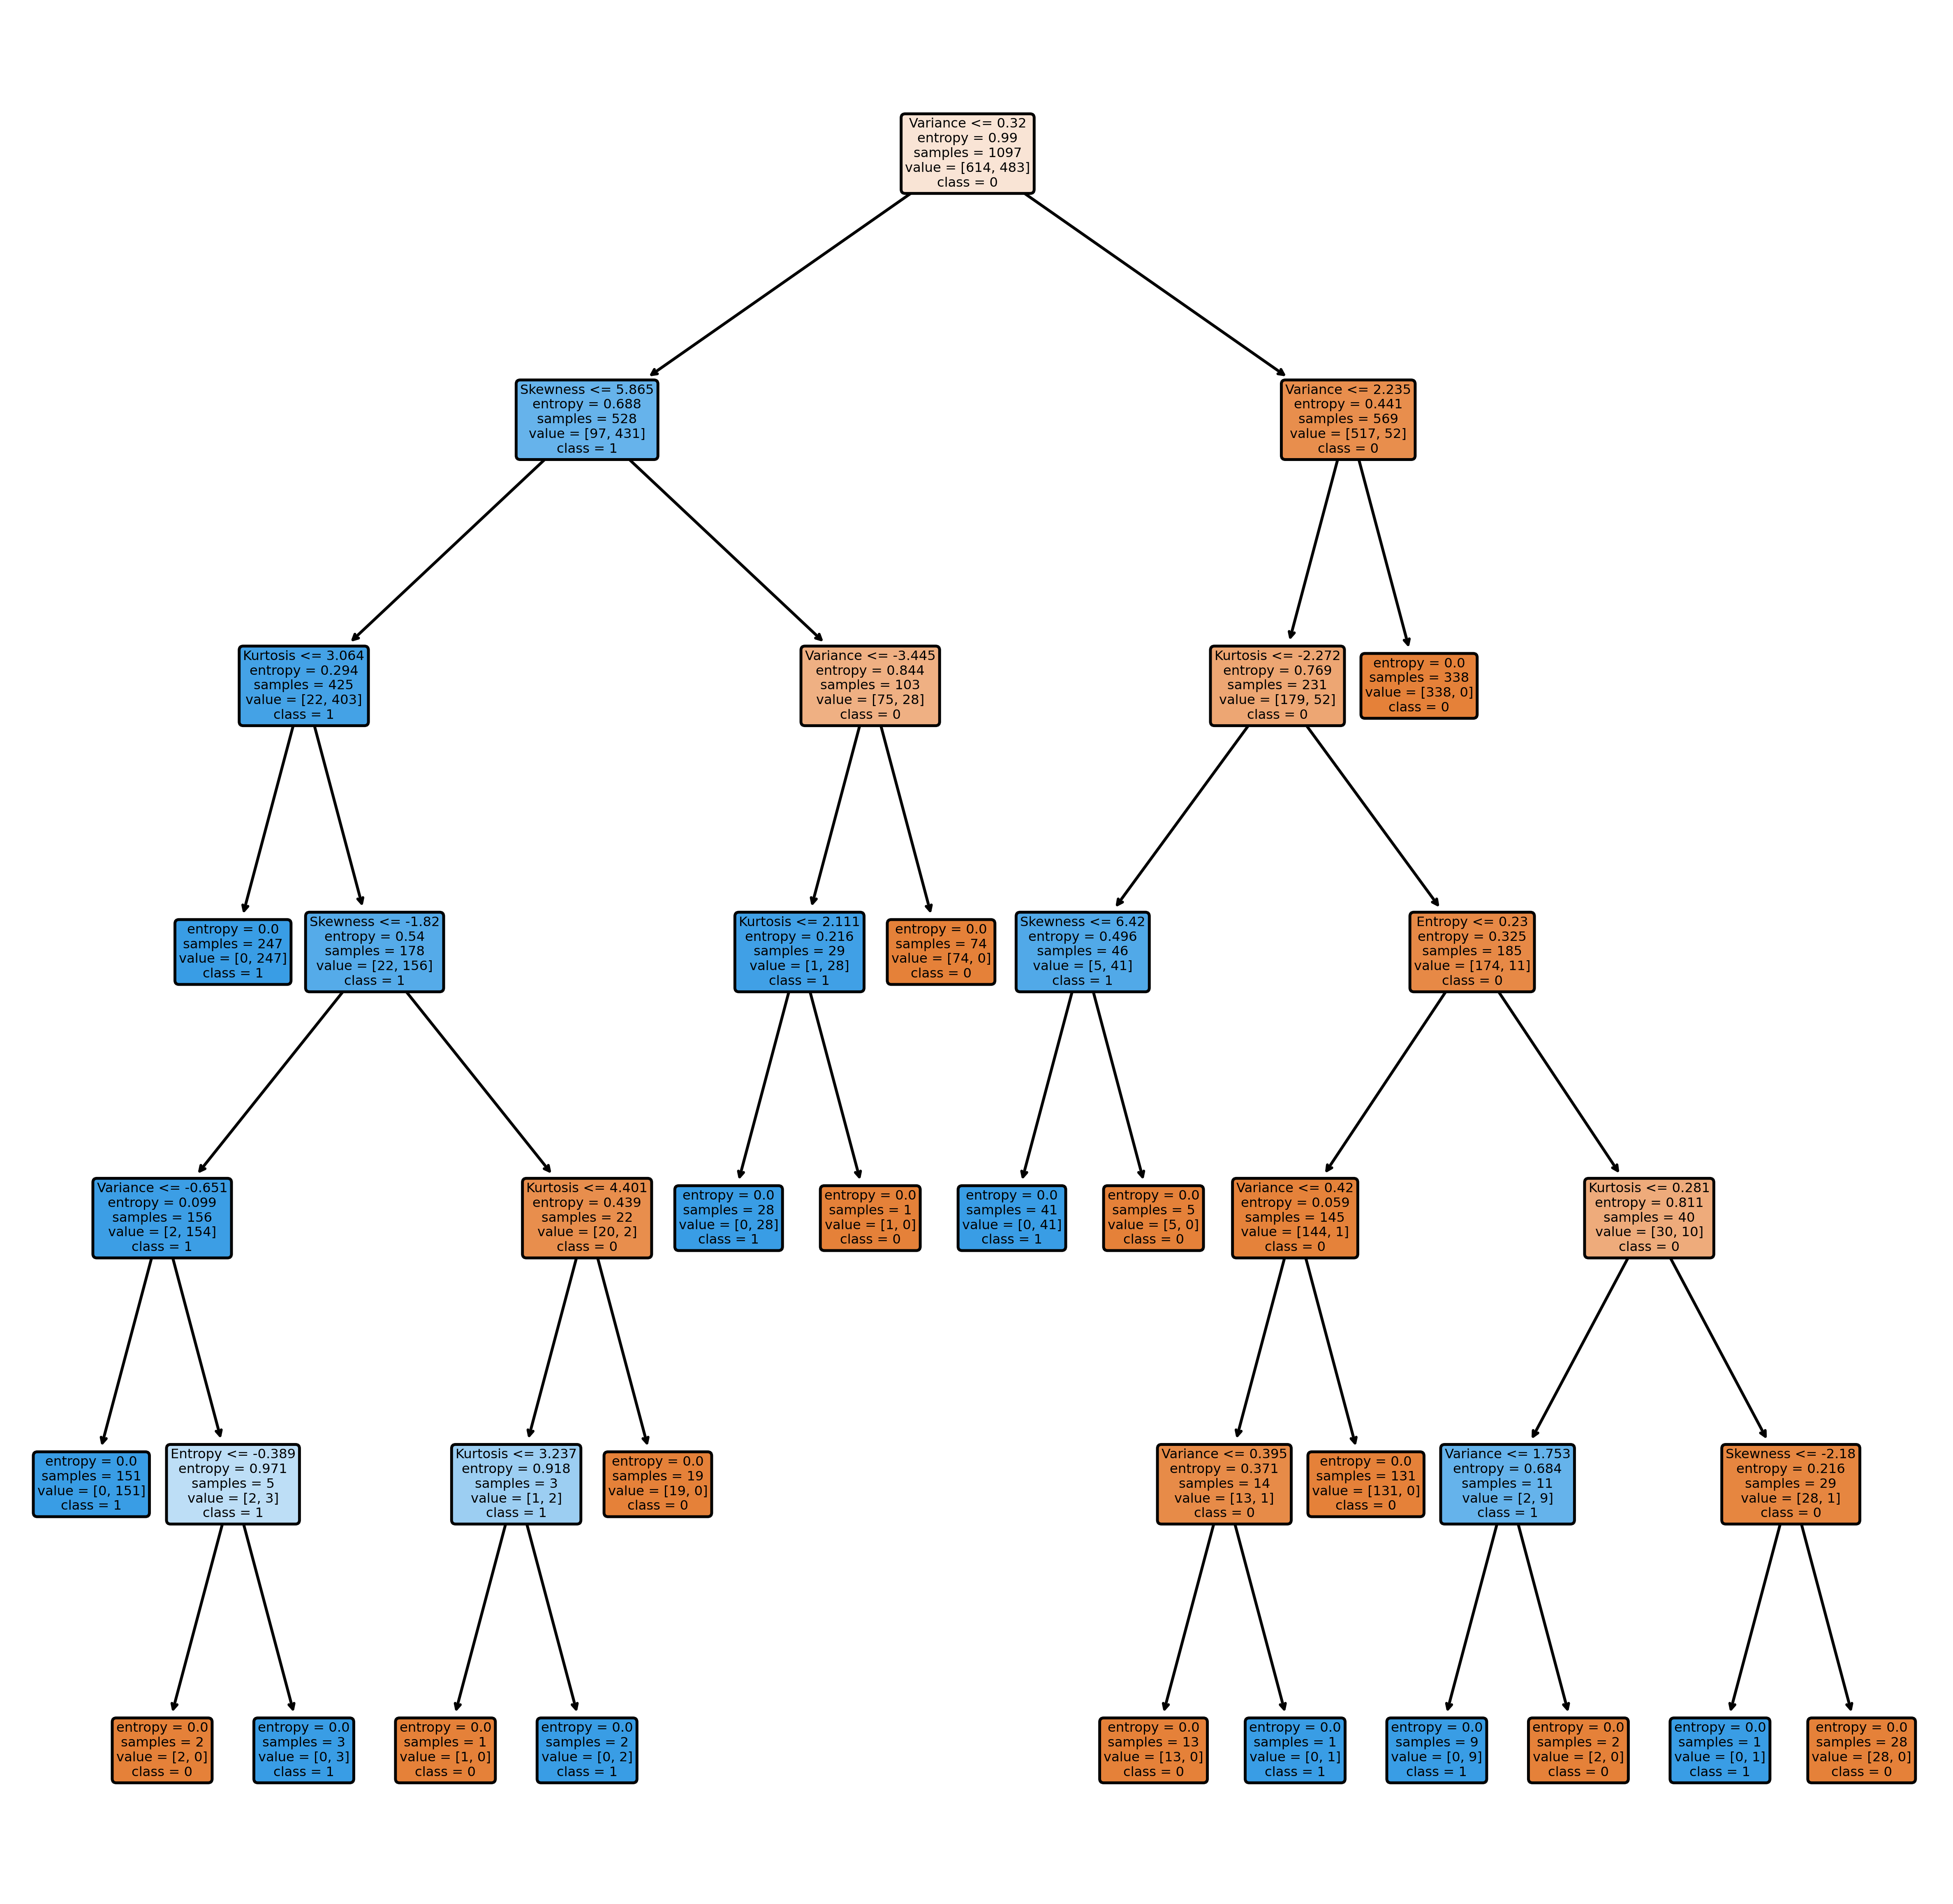

In [12]:
# Plot and show decision tree
plt.figure(figsize=(12,12), dpi=500)
tree.plot_tree(classifier_2, 
               feature_names=X.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
plt.show()

- We discussed earlier that decision trees are very sensitive to outliers. Try to identify and remove/fix any possible outliers in the dataset.

Accuracy is :0.9818181818181818

AUC is :0.98


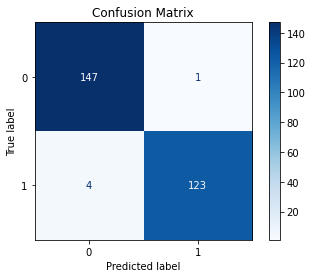

In [15]:
# Satndardize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scale_columns = ['Skewness', 'Kurtosis', 'Entropy']

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Apply MinMaxScaler to the selected columns
X_train_scaled[scale_columns] = scaler.fit_transform(X_train[scale_columns])
X_test_scaled[scale_columns] = scaler.transform(X_test[scale_columns])


# Train a DT classifier
clf_scaled = DecisionTreeClassifier(random_state=10, criterion='entropy')
clf_scaled.fit(X_train_scaled, y_train)

# Make predictions for test data
y_preds_scaled = clf_scaled.predict(X_test_scaled)

# Calculate accuracy
acc_scaled = accuracy_score(y_test, y_preds_scaled)
print('Accuracy is :{0}'.format(acc_scaled))

# Check the AUC for predictions
false_positive_rate_scaled, true_positive_rate_scaled, thresholds_scaled = roc_curve(y_test, y_preds_scaled)
roc_auc_scaled = auc(false_positive_rate_scaled, true_positive_rate_scaled)
print('\nAUC is :{0}'.format(round(roc_auc_scaled, 2)))

# Create and print a confusion matrix
cm_scaled = confusion_matrix(y_test, y_preds_scaled)
disp_scaled = ConfusionMatrixDisplay(confusion_matrix=cm_scaled, display_labels=clf_scaled.classes_)
disp_scaled.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

- Check the distributions of the data. Is there any room for normalization/scaling of the data? Apply these techniques and see if it improves the accuracy score.

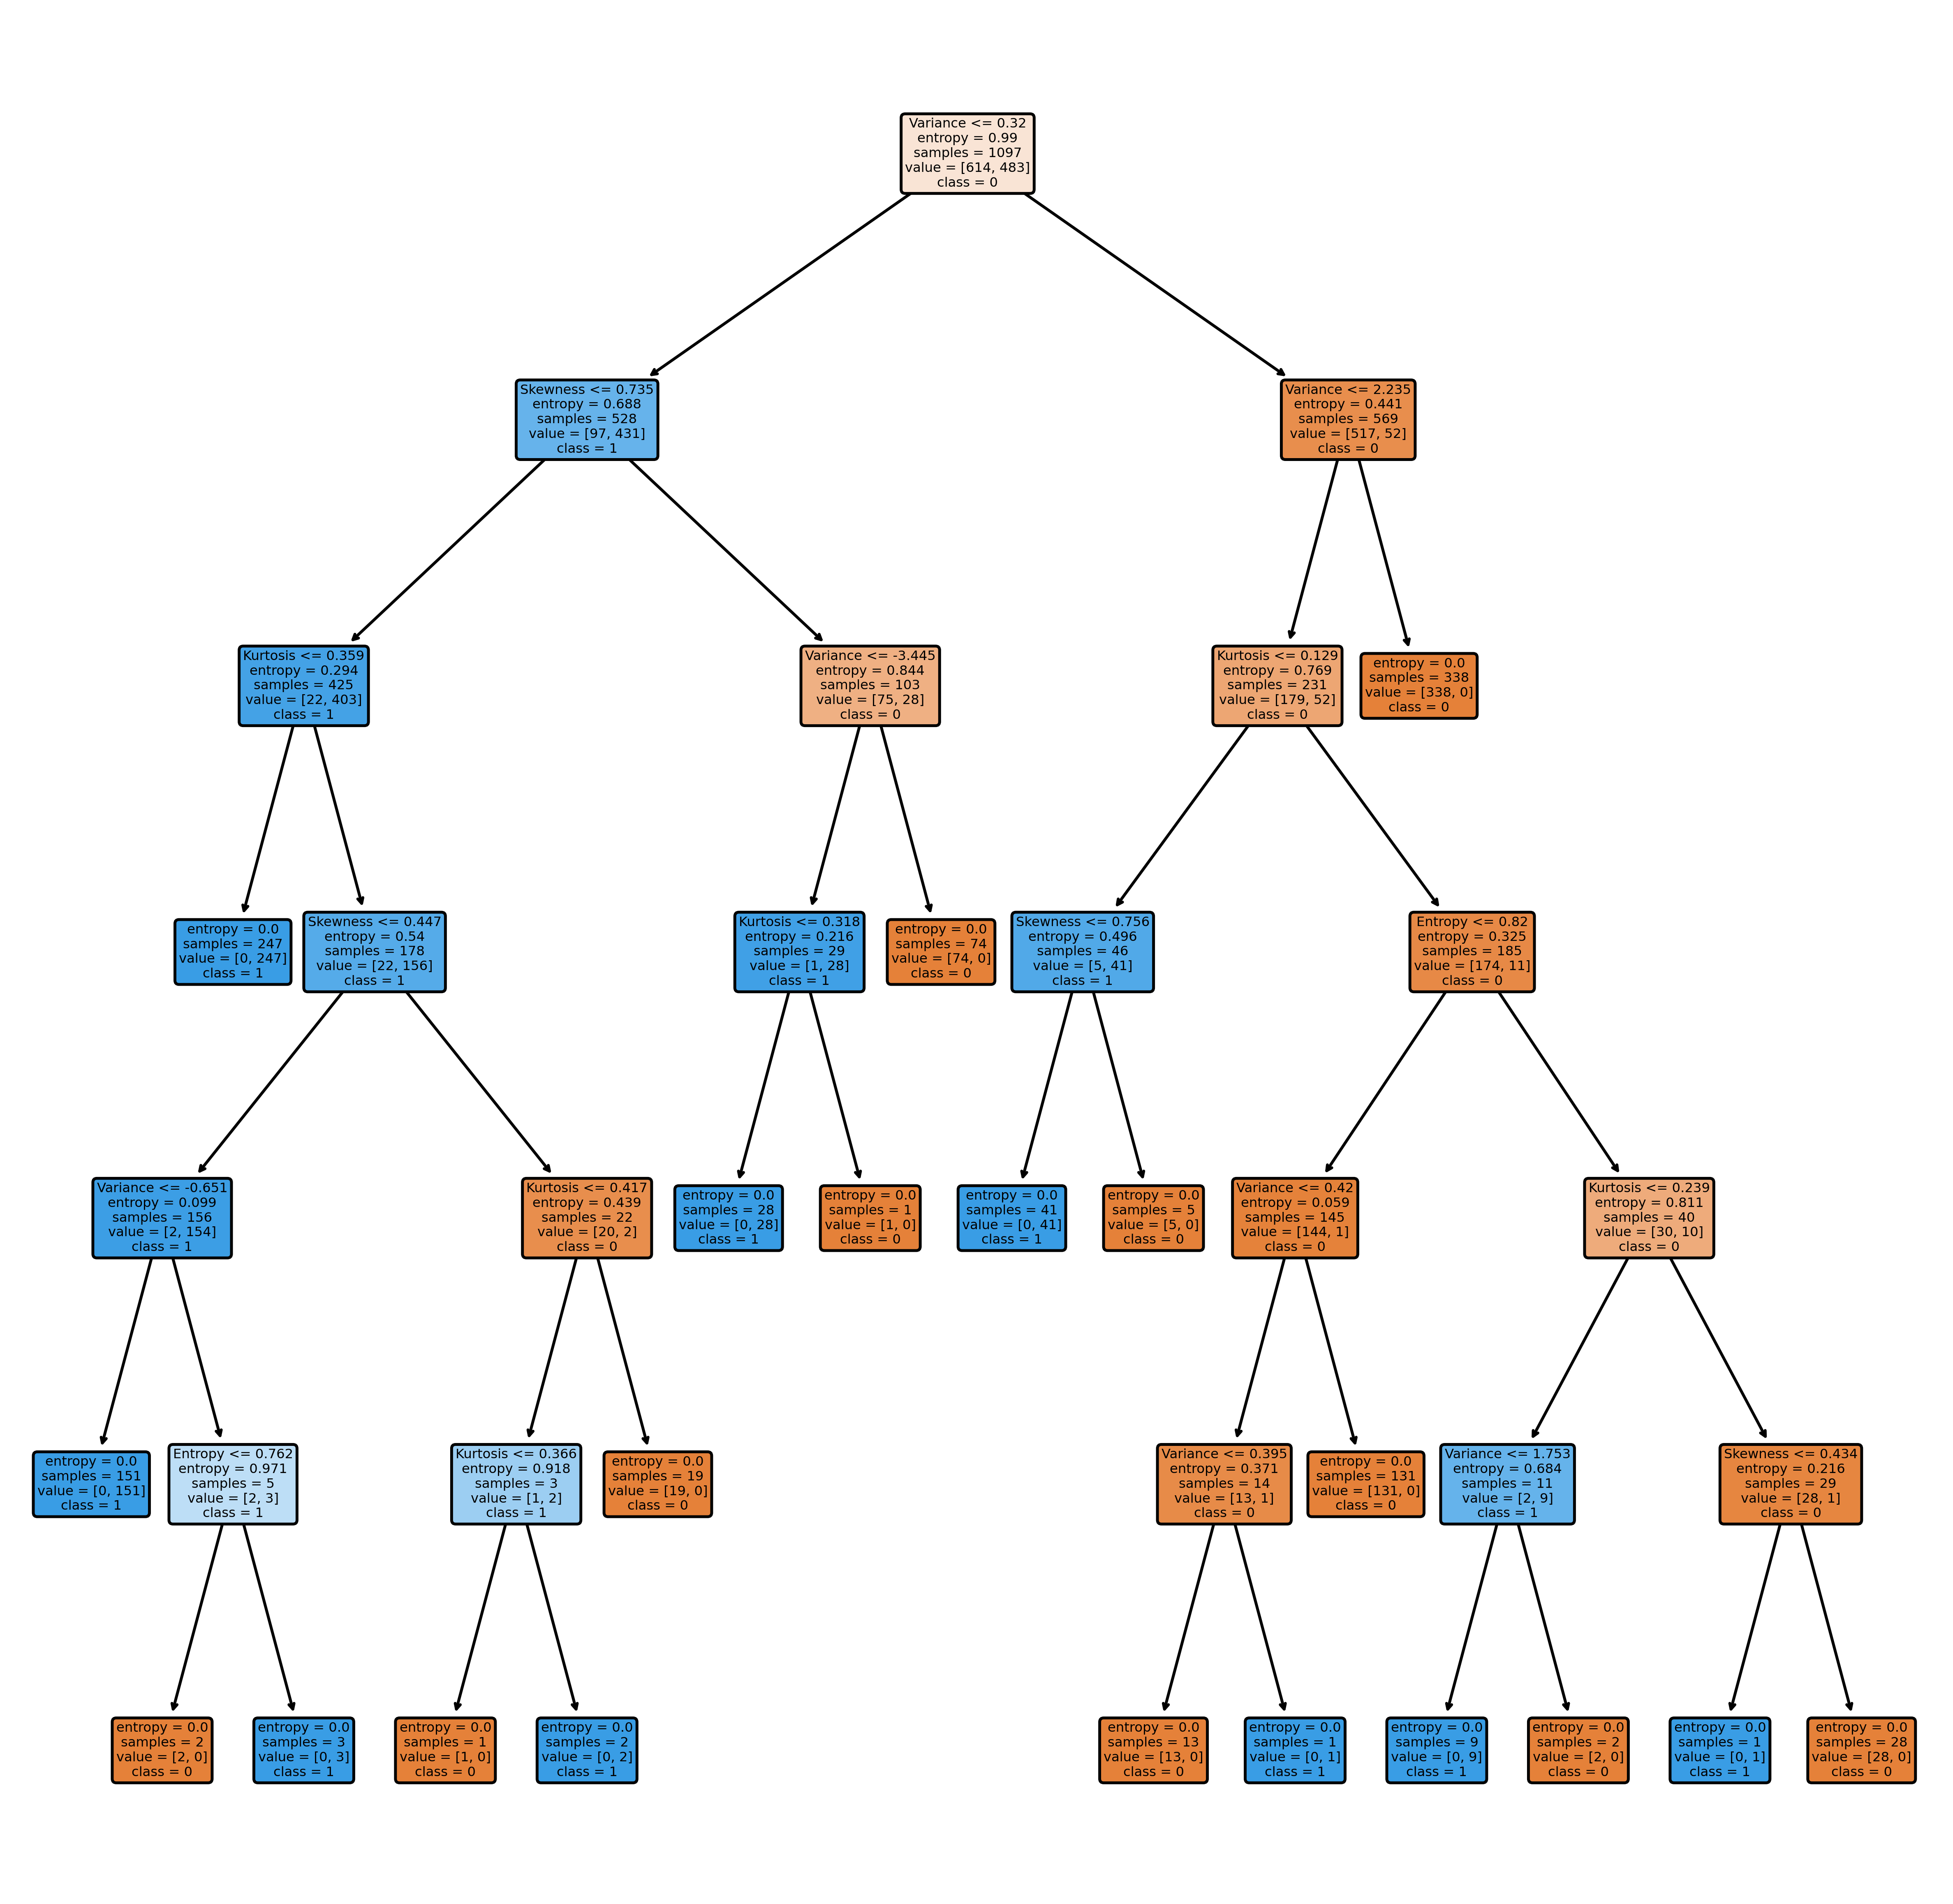

In [16]:
# Plot and show decision tree
plt.figure(figsize=(12,12), dpi=500)
tree.plot_tree(clf_scaled, 
               feature_names=X.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
plt.show()

## Summary 

In this lesson, we looked at growing a decision tree for the banknote authentication dataset, which is composed of extracted continuous features from photographic data. We looked at data acquisition, training, prediction, and evaluation. We also looked at growing trees using entropy vs. gini impurity criteria. In following lessons, we shall look at more pre-training tuning techniques for ensuring an optimal classifier for learning and prediction.  